In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

El conjunto de datos esta disponible en UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality

Para más detalles consultar [Cortez et al., 2009].

Cita: Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.

#Se cargan los datos

In [20]:
df = pd.read_csv("/content/winequalityN.csv")
df_white = df[df["type"] == "white"].drop("type", axis = 1)

#Se hace un análisis exploratorio de los datos

In [21]:
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,NaN,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4890.000000,4891.000000,4896.000000,4896.000000,4896.000000,4898.000000,4898.000000,4898.000000,4891.000000,4896.000000,4898.000000,4898.000000
mean,6.855532,0.278252,0.334250,6.393250,0.045778,35.308085,138.360657,0.994027,3.188203,0.489835,10.514267,5.877909
std,0.843808,0.100811,0.120985,5.072275,0.021850,17.007137,42.498065,0.002991,0.151014,0.114147,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
df_white.isnull().sum()

fixed acidity           8
volatile acidity        7
citric acid             2
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      7
sulphates               2
alcohol                 0
quality                 0
dtype: int64

In [6]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4890 non-null   float64
 1   volatile acidity      4891 non-null   float64
 2   citric acid           4896 non-null   float64
 3   residual sugar        4896 non-null   float64
 4   chlorides             4896 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4891 non-null   float64
 9   sulphates             4896 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 497.5 KB


In [7]:
df_white['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [23]:
X = df_white.drop("quality", axis = 1).copy()

In [22]:
y = df_white["quality"].copy()

##Se crea un conjunto de prueba

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [11]:
y_train.value_counts()

6    1758
5    1166
7     704
8     140
4     130
3      16
9       4
Name: quality, dtype: int64

In [12]:
y_test.value_counts()

6    440
5    291
7    176
8     35
4     33
3      4
9      1
Name: quality, dtype: int64

In [13]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3690,5.6,0.21,0.24,4.4,0.027,37.0,150.0,0.99100,3.30,0.31,11.5
3463,6.2,0.30,0.31,1.6,0.035,40.0,106.0,0.98914,3.26,0.39,12.9
683,6.4,0.27,0.32,4.5,0.240,61.0,174.0,0.99480,3.12,0.48,9.4
3698,6.3,0.22,0.34,1.2,0.036,32.0,96.0,0.98961,3.06,0.74,11.6
3253,5.3,0.30,0.16,4.2,0.029,37.0,100.0,0.99050,3.30,0.36,11.8
...,...,...,...,...,...,...,...,...,...,...,...
2027,6.9,0.32,0.15,8.1,0.046,51.0,180.0,0.99580,3.13,0.45,8.9
862,4.8,0.34,0.00,6.5,0.028,33.0,163.0,0.99390,3.36,0.61,9.9
1627,8.9,0.32,0.49,1.6,0.050,17.0,131.0,0.99560,3.13,0.34,9.4
2904,6.4,0.25,0.32,0.9,0.034,40.0,114.0,0.99114,3.31,0.58,10.8


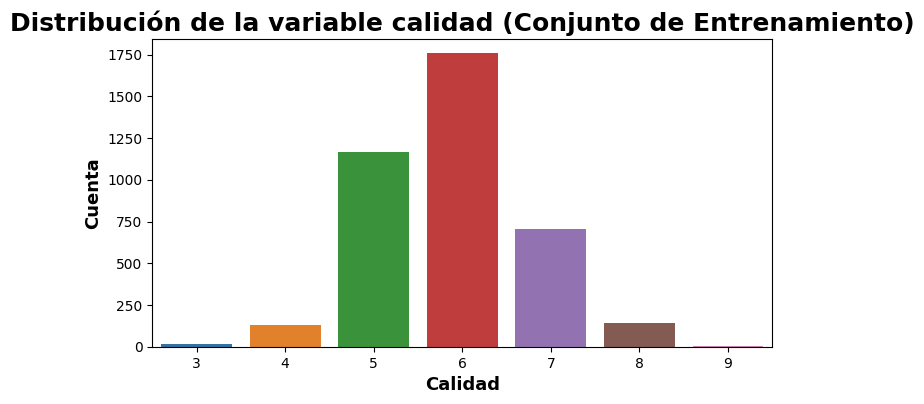

In [78]:
plt.figure(figsize=(8,4))
sns.countplot(x = y_train)
plt.title("Distribución de la variable calidad (Conjunto de Entrenamiento)",fontsize = 18,fontweight = 'bold')
plt.xlabel("Calidad",fontsize = 13,fontweight = 'bold')
plt.ylabel("Cuenta",fontsize=13,fontweight = 'bold')
plt.show()

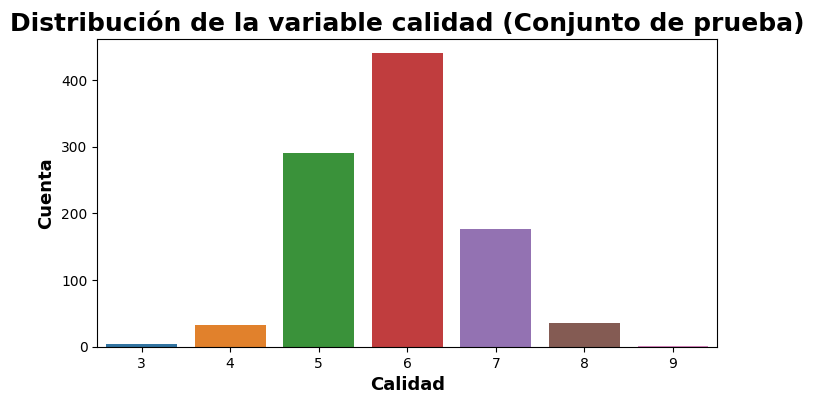

In [80]:
plt.figure(figsize=(8,4))
sns.countplot(x = y_test)
plt.title("Distribución de la variable calidad (Conjunto de prueba)",fontsize = 18,fontweight = 'bold')
plt.xlabel("Calidad",fontsize = 13,fontweight = 'bold')
plt.ylabel("Cuenta",fontsize=13,fontweight = 'bold')
plt.show()

De las gráficas anteriores se observa un desbalance de datos entre las clases de calidad

In [14]:
a = X_train.assign(quality = np.array(y_train.tolist()))

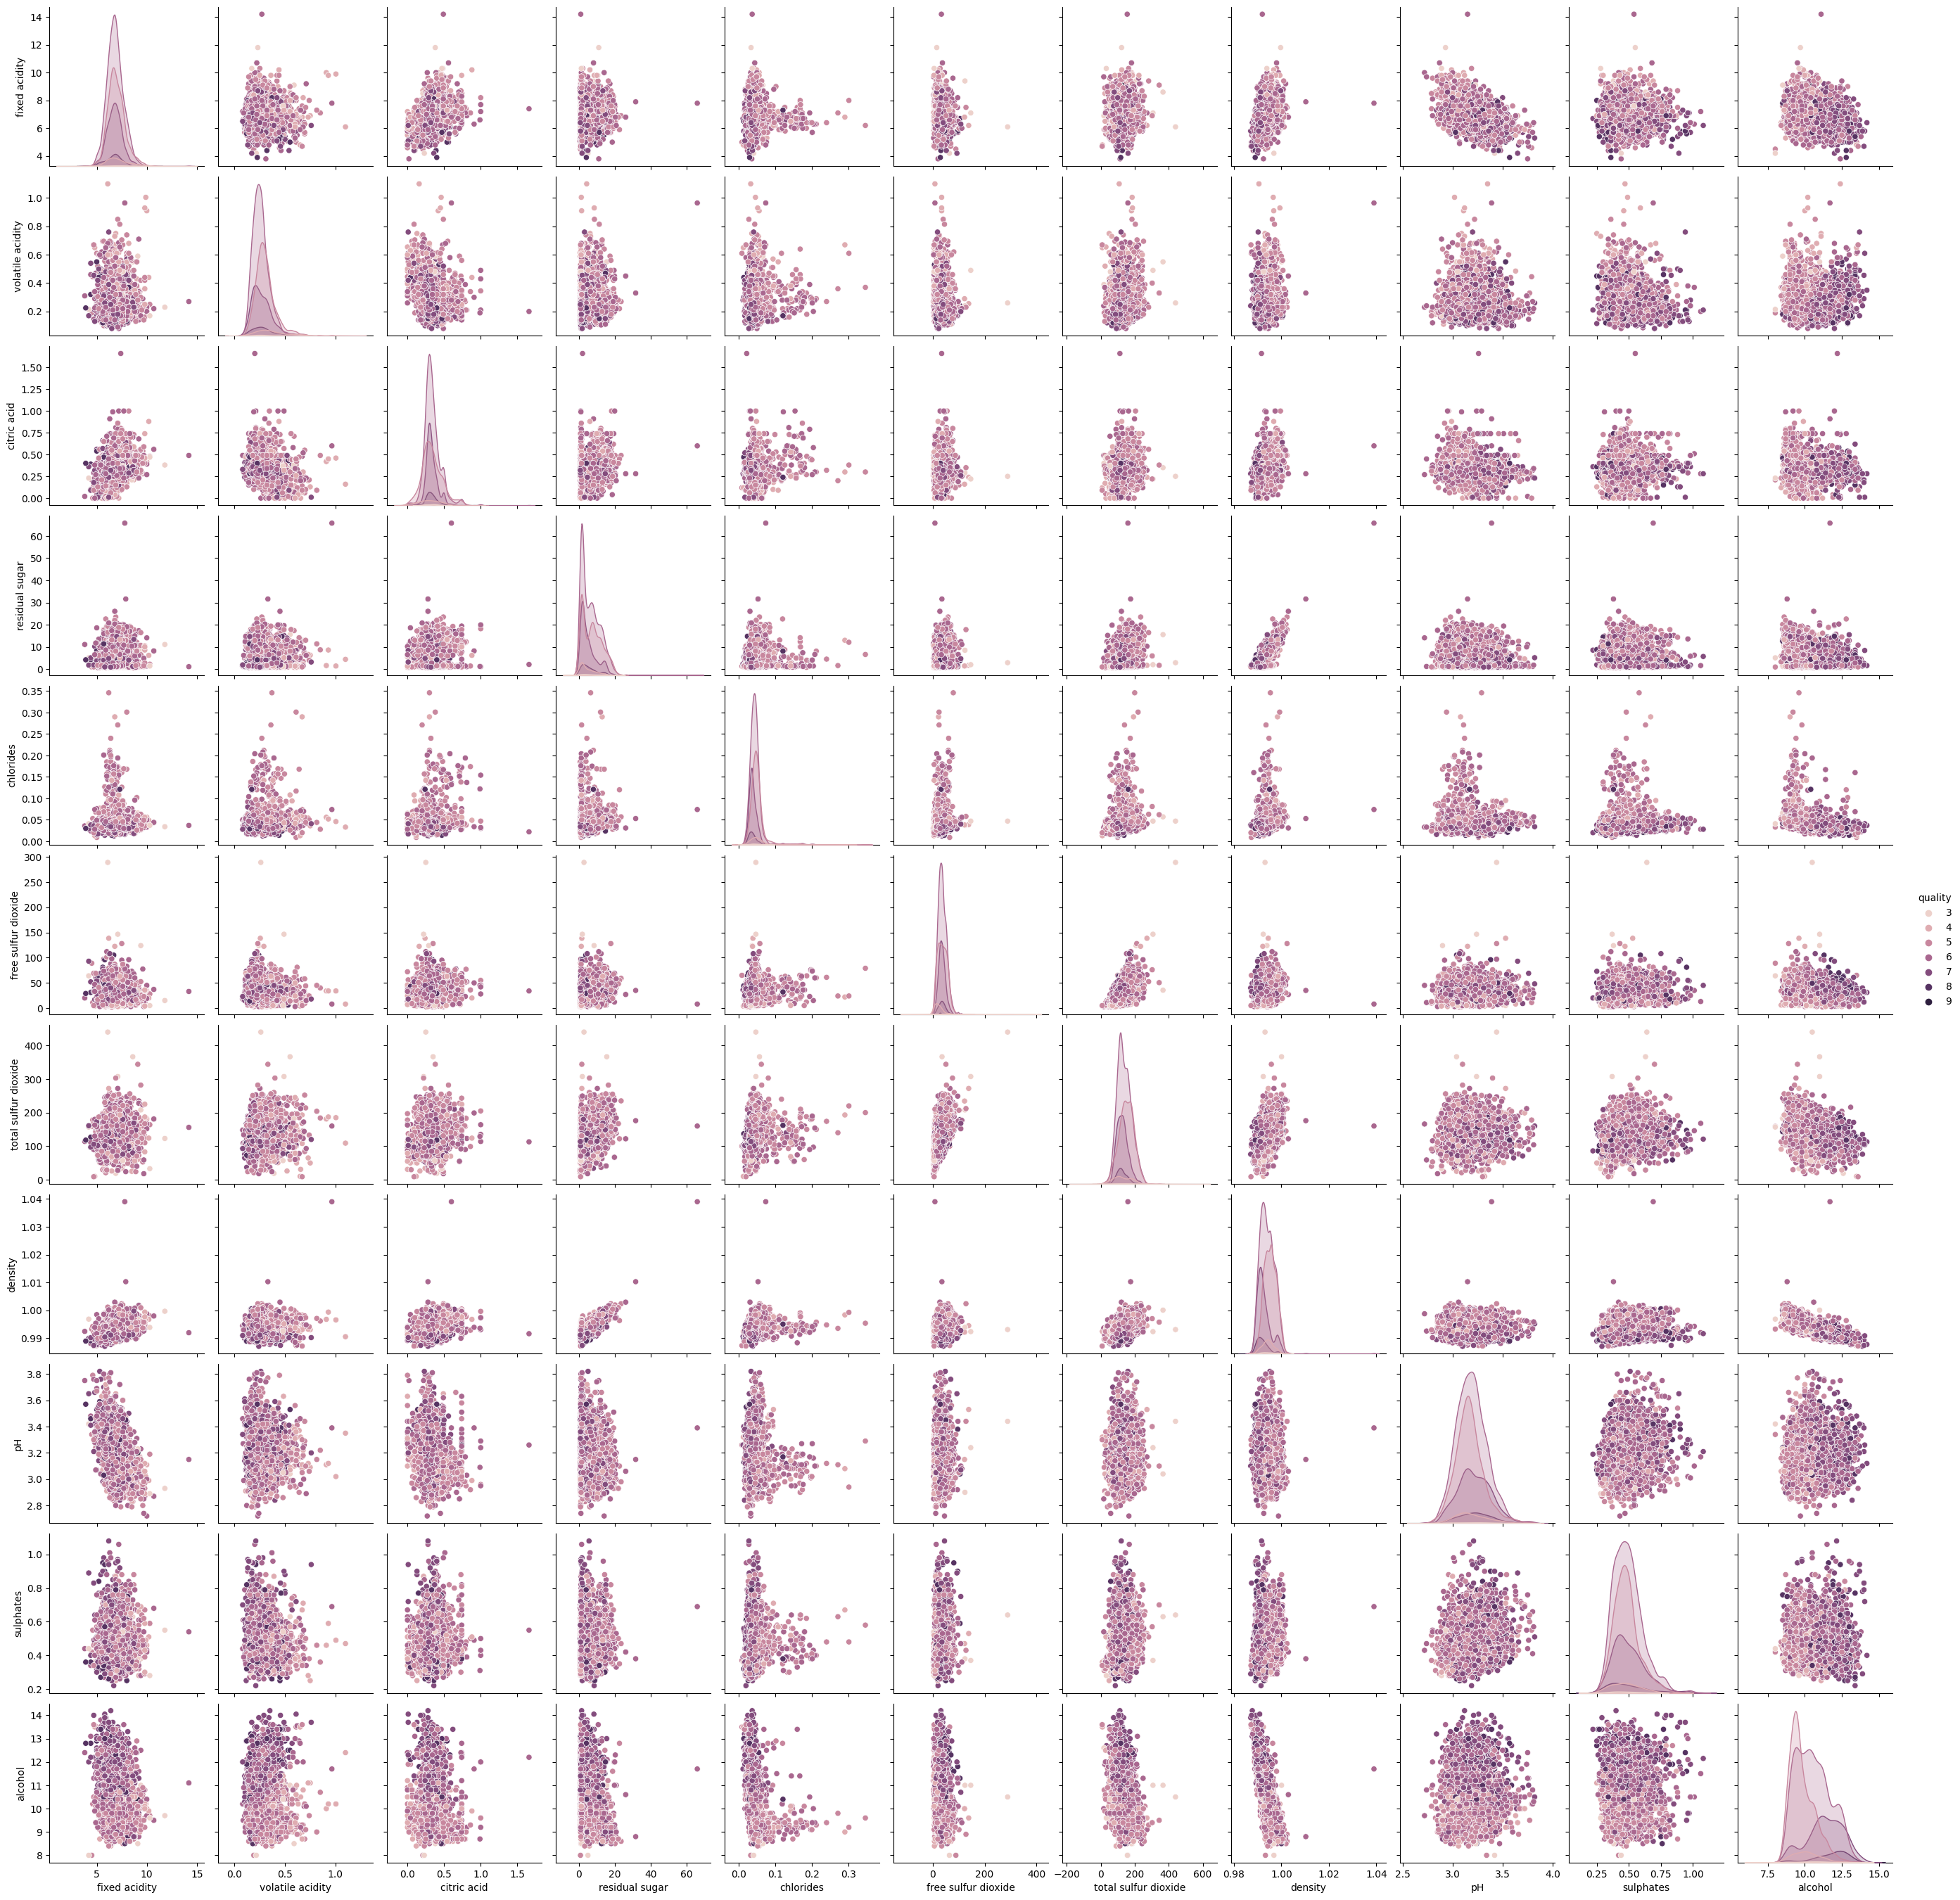

In [17]:
sns.pairplot(a ,hue = "quality" )

##Se buscan correlaciones entre las variables

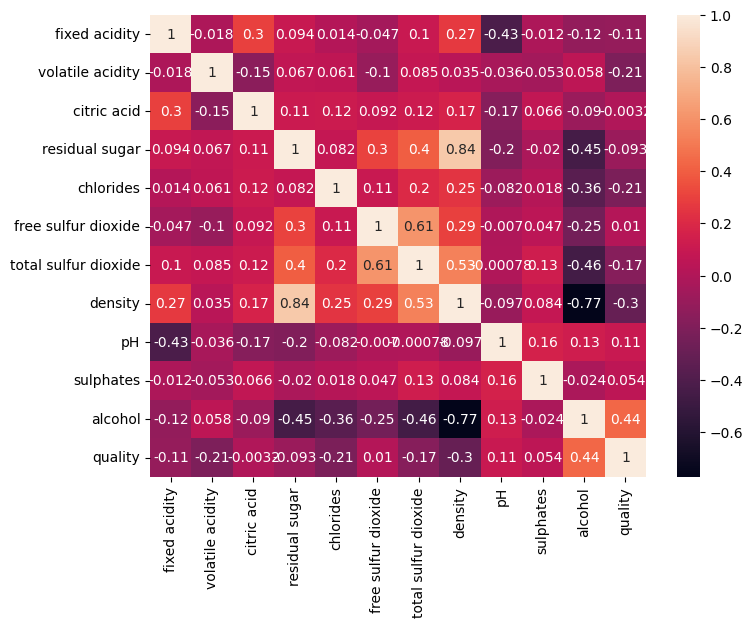

In [118]:
corr_df =X_train.assign(quality = np.array(y_train.tolist())).corr(method="pearson", numeric_only = True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

#Data cleaning

##Se cambian los valores nulos por la mediana de los valores.

In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

X_num = X_train.copy()

imputer.fit(X_num)

imputer.statistics_

array([6.8000e+00, 2.6000e-01, 3.2000e-01, 5.2000e+00, 4.3000e-02,
       3.4000e+01, 1.3400e+02, 9.9378e-01, 3.1800e+00, 4.7000e-01,
       1.0400e+01])

In [27]:
X_new = imputer.transform(X_num)

In [28]:
X_tr = pd.DataFrame(X_new, columns=X_num.columns,
                    index=X_num.index)

In [29]:
X_tr.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

##Se realiza un escalado de las características

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
standard_scaler = StandardScaler()

X_SS = standard_scaler.fit_transform(X_tr)

X_SDF = pd.DataFrame(X_SS, columns=X_tr.columns,
                    index=X_tr.index)

In [33]:
X_encoded = X_SDF.copy()

In [34]:
X_encoded

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3690,-1.478955,-0.677339,-0.777631,-0.396639,-0.877088,0.090254,0.273654,-1.015152,0.728680,-1.572812,0.811436
3463,-0.775157,0.225916,-0.199185,-0.945371,-0.502749,0.265528,-0.762947,-1.633570,0.466768,-0.870188,1.954627
683,-0.540557,-0.075169,-0.116550,-0.377041,9.089688,1.492444,0.839073,0.248282,-0.449923,-0.079736,-0.903350
3698,-0.657857,-0.576977,0.048721,-1.023761,-0.455957,-0.201869,-0.998539,-1.477303,-0.842790,2.203792,0.893092
3253,-1.830854,0.225916,-1.438712,-0.435834,-0.783504,0.090254,-0.904302,-1.181394,0.728680,-1.133672,1.056405
...,...,...,...,...,...,...,...,...,...,...,...
2027,0.045941,0.426639,-1.521347,0.328472,0.011967,0.908198,0.980427,0.580765,-0.384445,-0.343220,-1.311633
862,-2.417352,0.627363,-2.760874,0.014911,-0.830296,-0.143444,0.579922,-0.050952,1.121548,1.062028,-0.495068
1627,2.391934,0.426639,1.288248,-0.945371,0.199136,-1.078238,-0.173969,0.514268,-0.384445,-1.309328,-0.903350
2904,-0.540557,-0.275892,-0.116550,-1.082554,-0.549542,0.265528,-0.574474,-0.968605,0.794158,0.798544,0.239840


In [35]:
X_encoded.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,3.918000e+03,3.918000e+03,3.918000e+03,3.918000e+03,3.918000e+03,3.918000e+03,3.918000e+03,3.918000e+03,3.918000e+03,3.918000e+03,3.918000e+03
mean,-1.033715e-16,3.046738e-16,-8.342258e-17,-6.710077e-17,-1.940482e-16,-1.813534e-17,1.877008e-16,-2.179506e-14,-2.736623e-15,-1.287609e-16,3.989775e-16
std,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00
min,-3.590348e+00,-1.982040e+00,-2.760874e+00,-1.141347e+00,-1.719351e+00,-1.954607e+00,-3.048182e+00,-2.308510e+00,-3.069040e+00,-2.363263e+00,-2.046541e+00
25%,-6.578570e-01,-6.773387e-01,-5.297254e-01,-9.257735e-01,-4.559570e-01,-6.692657e-01,-6.922701e-01,-7.624654e-01,-7.118344e-01,-6.945316e-01,-8.216940e-01
50%,-7.135878e-02,-1.755304e-01,-1.165497e-01,-2.398579e-01,-1.284103e-01,-8.501985e-02,-1.032921e-01,-9.085019e-02,-5.705504e-02,-1.675636e-01,-8.678556e-02
75%,5.151395e-01,4.266395e-01,4.618963e-01,6.959270e-01,1.991363e-01,6.160752e-01,6.741588e-01,6.996276e-01,5.977243e-01,5.350603e-01,7.297794e-01
max,8.608815e+00,8.254849e+00,1.095656e+01,1.163628e+01,1.404968e+01,1.481325e+01,7.105798e+00,1.493737e+01,4.133533e+00,5.189944e+00,3.016161e+00


#Se crean los modelos

##SGDClassifier

In [36]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_encoded, y_train)

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_encoded, y_train, cv=3, scoring="accuracy")

array([0.48774885, 0.4287902 , 0.4525268 ])

In [38]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

In [39]:
poly_kernel_svm_clf = SVC(kernel="poly", degree=3, coef0=1, C=5)

poly_kernel_svm_clf.fit(X_encoded, y_train)

SVC(C=5, coef0=1, kernel='poly')

In [40]:
cross_val_score(poly_kernel_svm_clf, X_encoded, y_train, cv=3, scoring="accuracy")

array([0.54287902, 0.55589587, 0.55053599])

##DecisionTree

In [41]:
tree_clf = DecisionTreeClassifier()

tree_clf.fit(X_encoded, y_train)

cross_val_score(tree_clf, X_encoded, y_train, cv=3, scoring="accuracy")

array([0.55742726, 0.55895865, 0.54594181])

##RandomForest

In [42]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_encoded, y_train)

cross_val_score(rnd_clf, X_encoded, y_train, cv=3, scoring="accuracy")

array([0.53062787, 0.54977029, 0.55666156])

##XGBoost

In [43]:
y_adjusted = y_train-3

In [44]:
y_adjusted.value_counts()

3    1758
2    1166
4     704
5     140
1     130
0      16
6       4
Name: quality, dtype: int64

In [46]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class = 7, random_state=42)

xgb_clf.fit(X_encoded, y_adjusted)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=7,
              num_parallel_tree=None, ...)

In [47]:
cross_val_score(xgb_clf, X_encoded, y_adjusted, cv=4, scoring="accuracy")

array([0.61428571, 0.63061224, 0.64453524, 0.64147089])

In [48]:
np.mean(cross_val_score(xgb_clf, X_encoded, y_adjusted, cv=4, scoring="accuracy"))

0.6327260219716079

###Características más importantes

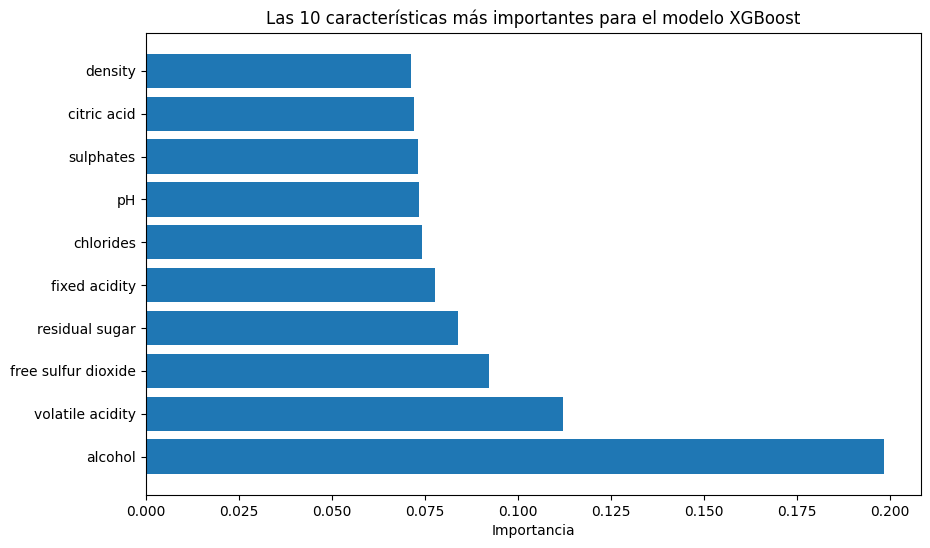

In [50]:
importance = xgb_clf.feature_importances_

# Obtener el nombre de las características
feature_names = X_encoded.columns  # Si los datos son un DataFrame de pandas

# Crear un DataFrame con las importancias y nombres de características
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

# Ordenar el DataFrame por importancia de manera descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar las características más importantes
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Importancia')
plt.title('Las 10 características más importantes para el modelo XGBoost')
plt.show()

Visualización de 2 de las características más importantes

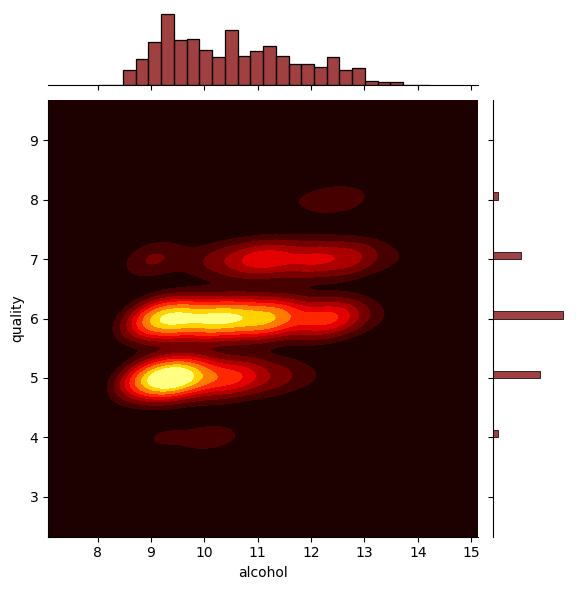

In [109]:
g = sns.JointGrid(data=a, x="alcohol", y= "quality")
g.plot_joint(sns.kdeplot, fill = True, cmap = "hot", thresh = 0)
g.plot_marginals(sns.histplot, color = "maroon")

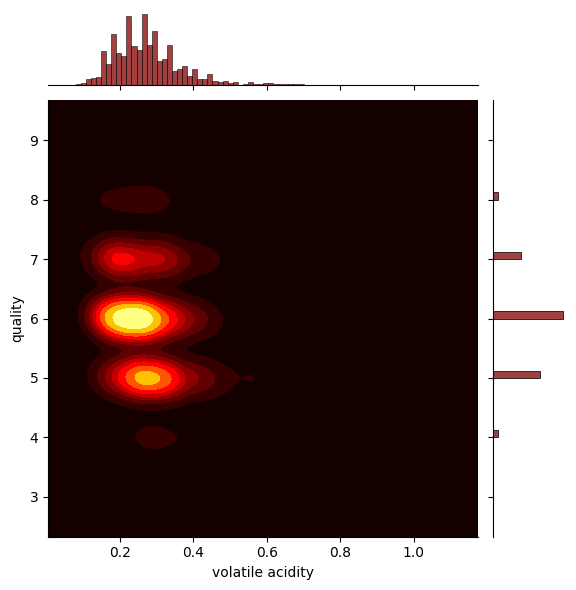

In [115]:
g = sns.JointGrid(data=a, x="volatile acidity", y= "quality")
g.plot_joint(sns.kdeplot, fill = True, cmap = "hot", thresh = 0)
g.plot_marginals(sns.histplot, color = "maroon")

###Análisis de error para el modelo XGBoost

In [52]:
from sklearn.model_selection import cross_val_predict

In [53]:
y_train_pred = cross_val_predict(xgb_clf, X_encoded, y_adjusted, cv=3)

In [68]:
from sklearn.metrics import confusion_matrix

Matriz de confusión

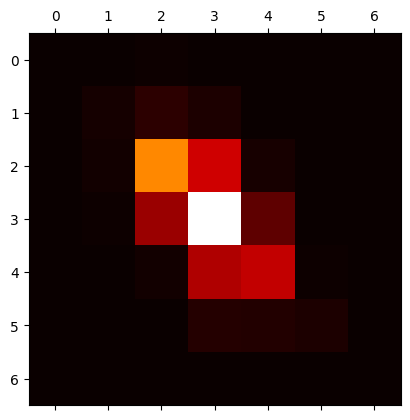

In [57]:
conf_mx = confusion_matrix(y_adjusted, y_train_pred)
plt.matshow(conf_mx, cmap="hot")#plt.cm.gray)
plt.show()

Tasa de error

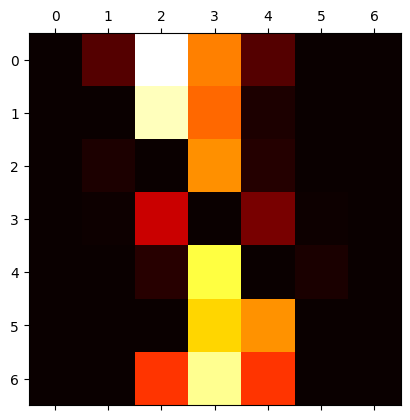

In [60]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap="hot")
plt.show()

## KNeigborsClassifier

In [61]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
Kmeans2 = KNeighborsClassifier(n_neighbors = k)
modelKNC = Kmeans2.fit(X_encoded, y_adjusted)

In [62]:
modelKNC.classes_

array([0, 1, 2, 3, 4, 5, 6])

In [63]:
y_pred = modelKNC.predict(X_encoded)

In [64]:
cross_val_score(modelKNC, X_encoded, y_adjusted, cv=4, scoring="accuracy")

array([0.53061224, 0.52857143, 0.56792646, 0.53626149])

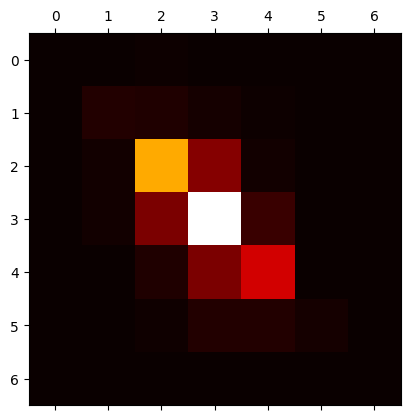

In [66]:
conf_mx = confusion_matrix(y_adjusted, y_pred)
plt.matshow(conf_mx, cmap="hot")
plt.show()

#Modelos con regresion

In [81]:
regression_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

In [82]:
regression_model.fit(X_encoded, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [83]:
cross_val_score(regression_model, X_encoded, y_adjusted, cv=4, scoring='neg_mean_squared_error')

array([-0.45173946, -0.45132267, -0.44200332, -0.43370729])

In [89]:
predicciones = cross_val_predict(regression_model, X_encoded, y_train, cv=3)

In [91]:
c1 = 0

for i in range(len(predicciones)):
  if abs(y_train.iloc[i]-predicciones[i]) <= 1.0:
    c1 +=1

print(np.round(c1*100/3918,2), "%")

86.47 %


#Conclusión

El mejor modelo de clasificación fue XGBoostClassifier, con una exactitud promedio de 63%.

Debido al desbalance entre las clases de la variable calidad, el modelo predice con mayor frecuencia a las clases 5, 6 y 7. Lo cual hace que estas clases tengan mucho recall y poca precisión.

 Utilizando el modelo XGBRegressor con una tolerancia de 1.0 se obtiene una exactitud de 86.47%.

 La exactitud de los modelos de clasificación puede mejorar aplicando un tratamiento de clases desbalanceadas como: sobremuestreo o el algoritmo SMOTE.